In [60]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

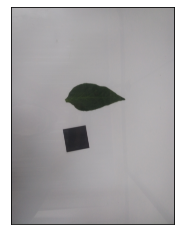

In [61]:
image = cv.imread('./images/bell_pepper_1_pat_4cm_dist_30cm.jpg')
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
original_image_shape = image.shape
%matplotlib inline

# image = cv.GaussianBlur(image, (7, 7), 0)
plt.imshow(image)
plt.xticks([]), plt.yticks([])
plt.show()

In [62]:
image = image.reshape((image.shape[0] * image.shape[1], 3))
image = np.float32(image)

In [63]:
k = 2
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.85)

retval, labels, centers = cv.kmeans(image, k, None, criteria, 10, cv.KMEANS_PP_CENTERS)
labels_flatten = labels.flatten()

In [ ]:
centers = np.uint8(centers)

segmented_data = centers[labels_flatten]
segmented_image = segmented_data.reshape(original_image_shape)

In [ ]:
binary_intensity = np.array([0, 255])

threshold_data = binary_intensity[labels_flatten]
threshold_image = threshold_data.reshape((original_image_shape[0], original_image_shape[1], 1))

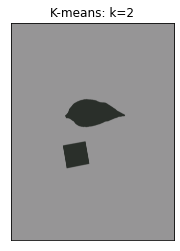

In [ ]:
plt.imshow(segmented_image)
plt.xticks([]), plt.yticks([])
plt.title("K-means: k=2")
plt.show()

In [ ]:
output_image = cv.cvtColor(segmented_image, cv.COLOR_RGB2BGR)
cv.imwrite("./segmented_images/bell_pepper_1_pat_4cm_dist_30cm_mask.jpg", output_image)

True

In [ ]:
cv.imwrite("./threshold_images/bell_pepper_1_pat_4cm_dist_30cm_mask_threshold.jpg", threshold_image)

True